In [1]:
# plot the audio data
# use popup window
# %matplotlib qt
import matplotlib.pyplot as plt

from utils import *# plot the audio data
# use popup window
# %matplotlib qt
import matplotlib.pyplot as plt

from utils import *

chrip freq 5000, 10000.0
chrip freq 7000, 11000.0


In [7]:
rate = 48000
seconds = 1.6

test_freqs = np.linspace(1000, 15000, 15)
# test_freqs = [400]
print(test_freqs)

freq_amp_map = {}

for freq in test_freqs:
    cycle_time = 1 / freq
    cycle_samples = int(cycle_time * rate)
    n_cycles = int(seconds / cycle_time)
    t = np.linspace(0, n_cycles * cycle_time, n_cycles * cycle_samples, endpoint=False)
    y = sine_wave(freq)(t)

    record_wave, play_wave, rate = play_and_record(y, rate, discard=False)
    record_wave = record_wave[rate//2:rate//2+rate]

    amp = np.max(record_wave)

    freq_amp_map[freq] = amp

[15000]


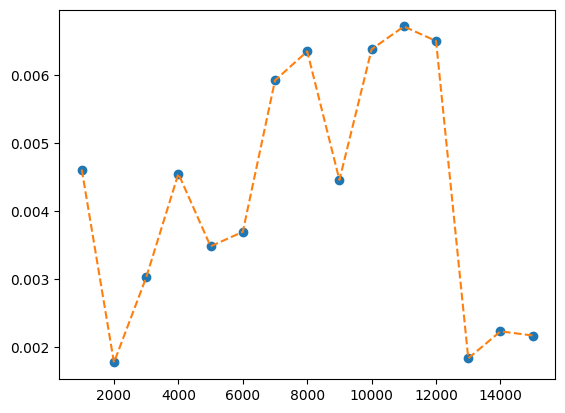

In [3]:
x = sorted(list(freq_amp_map.keys()))
y = np.array([freq_amp_map[f] for f in x])
plt.plot(x, y, 'o')
plt.plot(x, y, '--')
plt.show()

Length of a symbol: 0.001 s
Frequency resolution: 1000.0 Hz
max corr 0.17359314429711004
max corr 0.15648866976170392
59793 60268


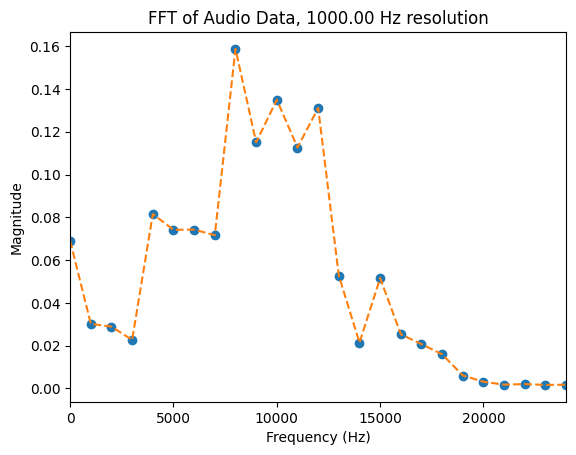

In [4]:
# use irfft to test
freq_amp_map = {}

rate = 48000
symbol_samples = 48
t_symbol = symbol_samples / rate
delta_f = 1 / t_symbol

print(f"Length of a symbol: {t_symbol} s")
print(f"Frequency resolution: {delta_f} Hz")

fft_freq = np.fft.rfftfreq(symbol_samples, 1 / rate)
fft_amp = np.zeros(fft_freq.shape, dtype=np.complex128)

test_freqs = [1000*i for i in range(1, 25)]
# print(test_freqs)
for freq in test_freqs:
    fft_amp[int(freq // delta_f)] = 1j

signal = np.fft.irfft(fft_amp)
signal = signal / np.max(np.abs(signal))

y = np.concatenate([signal for _ in range(10)])

# plt.plot(signal)
record_wave, rate, raw_wave = play_and_record_precise2(y, rate)

# plt.plot(record_wave)

plot_fft(record_wave[symbol_samples*2:symbol_samples*3], rate)

# Conclusion
# For resolution of 1000Hz
# usable range 1000Hz-12000Hz